In [2]:
# Import some libs
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl as op
import seaborn as sns

In [3]:
# read data
#df = pd.read_excel('data/5 - Muesli Project raw data.xlsx', skiprows=1) # remove first row

df_orders = pd.read_csv('data/5 - Muesli Project raw data - Orders.csv', skiprows=1)
df_campaigns = pd.read_csv('data/5 - Muesli Project raw data - Campaign Data.csv')
df_intern_data = pd.read_csv('data/5 - Muesli Project raw data - InternData Study.csv')
df_process_data = pd.read_csv('data/5 - Muesli Project raw data - Order Process Data.csv')

#df_process_data.head(20)

In [4]:
# clean up data - replace ' ' with '_'

cols = df_orders.columns.tolist()
cols = [col.replace(' ', '_') for col in cols]
df_orders.columns = cols

cols = df_campaigns.columns.tolist()
cols = [col.replace(' ', '_') for col in cols]
df_campaigns.columns = cols

cols = df_intern_data.columns.tolist()
cols = [col.replace(' ', '_') for col in cols]
df_intern_data.columns = cols

cols = df_process_data.columns.tolist()
cols = [col.replace(' ', '_') for col in cols]
df_process_data.columns = cols

#df_process_data.head(20)


In [5]:
# clean up - data - convert date string to datetime obj.

df_orders['Order_Date'] = pd.to_datetime(df_orders['Order_Date'], dayfirst=True, format="%d/%m/%y", infer_datetime_format=True)

df_campaigns['Arrival_Scan_Date'] = pd.to_datetime(df_campaigns['Arrival_Scan_Date'], dayfirst=True, format="%d/%m/%y", infer_datetime_format=True)

df_intern_data['Ready_to_Ship_Date'] = pd.to_datetime(df_intern_data['Ready_to_Ship_Date'], dayfirst=True, format="%d/%m/%y", infer_datetime_format=True)
df_intern_data['Pickup_Date'] = pd.to_datetime(df_intern_data['Pickup_Date'], dayfirst=True, format="%d/%m/%y", infer_datetime_format=True)

df_process_data['Order_Date'] = pd.to_datetime(df_process_data['Order_Date'], dayfirst=True, format="%d/%m/%y", infer_datetime_format=True)
df_process_data['On_Truck_Scan_Date'] = pd.to_datetime(df_process_data['On_Truck_Scan_Date'], dayfirst=True, format="%d/%m/%y", infer_datetime_format=True)

#df_process_data.head(20)

In [6]:
# find duplicates and remove

df_orders.drop(['Index'], axis=1, inplace=True)
df_orders.drop_duplicates(inplace=True)
#df_orders.duplicated().value_counts()

df_intern_data.drop_duplicates(inplace=True) 
#df_intern_data.duplicated().value_counts()

df_process_data.drop(['Row_ID'], axis=1, inplace=True)
df_process_data.drop_duplicates(inplace=True)
#df_process_data.duplicated().value_counts()

In [7]:
df_orders.head()
df_process = df_orders[['Order_ID', 'Order_Date']]



In [8]:
df_process.head()

,Order_ID,Order_Date
0,CA-2019-121755,2019-01-16
1,CA-2019-118255,2019-03-11
2,CA-2019-169194,2019-06-20
3,CA-2019-111682,2019-06-17
4,CA-2018-135545,2018-11-24


In [9]:

df_process.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9993
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order_ID    9993 non-null   object        
 1   Order_Date  9993 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 234.2+ KB


In [10]:
df_intern_data.head()

,Order_ID,Ready_to_Ship_Date,Pickup_Date
0,CA-2019-116540,2019-09-02,2019-09-03
2,CA-2019-129847,2019-09-04,2019-09-04
3,CA-2019-129630,2019-09-04,2019-09-04
4,CA-2019-106278,2019-09-05,2019-09-06
5,CA-2019-158099,2019-09-05,2019-09-06


In [11]:
#merge all dates to one dataframe
df_process = pd.merge(
    pd.DataFrame(df_process),
    pd.DataFrame(df_intern_data[["Order_ID", "Ready_to_Ship_Date", "Pickup_Date"]]),
    on='Order_ID',
    how='left')
df_process.head(30)

,Order_ID,Order_Date,Ready_to_Ship_Date,Pickup_Date
0,CA-2019-121755,2019-01-16,NaT,NaT
1,CA-2019-118255,2019-03-11,NaT,NaT
2,CA-2019-169194,2019-06-20,NaT,NaT
3,CA-2019-111682,2019-06-17,NaT,NaT
4,CA-2018-135545,2018-11-24,NaT,NaT
5,CA-2020-155558,2020-10-26,NaT,NaT
6,CA-2019-158568,2019-08-29,NaT,NaT
7,US-2018-156867,2018-11-13,NaT,NaT
8,CA-2020-119004,2020-11-23,2020-11-30,2020-12-02
9,CA-2018-129476,2018-10-15,NaT,NaT


In [12]:
df_process = pd.merge(
    pd.DataFrame(df_process),
    pd.DataFrame(df_process_data[["Order_ID", "On_Truck_Scan_Date", "Ship_Mode"]]),
    on='Order_ID',
    how='left')
df_process.head(30)

,Order_ID,Order_Date,Ready_to_Ship_Date,Pickup_Date,On_Truck_Scan_Date,Ship_Mode
0,CA-2019-121755,2019-01-16,NaT,NaT,2019-01-23,Standard Processing
1,CA-2019-118255,2019-03-11,NaT,NaT,2019-03-13,Express
2,CA-2019-169194,2019-06-20,NaT,NaT,2019-06-26,Standard Processing
3,CA-2019-111682,2019-06-17,NaT,NaT,2019-06-19,Express
4,CA-2018-135545,2018-11-24,NaT,NaT,NaT,NaN
5,CA-2020-155558,2020-10-26,NaT,NaT,2020-11-04,Standard Processing
6,CA-2019-158568,2019-08-29,NaT,NaT,2019-09-04,Standard Processing
7,US-2018-156867,2018-11-13,NaT,NaT,NaT,NaN
8,CA-2020-119004,2020-11-23,2020-11-30,2020-12-02,2020-12-02,Standard Processing
9,CA-2018-129476,2018-10-15,NaT,NaT,NaT,NaN


In [13]:
df_process.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9995 entries, 0 to 9994
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order_ID            9995 non-null   object        
 1   Order_Date          9995 non-null   datetime64[ns]
 2   Ready_to_Ship_Date  418 non-null    datetime64[ns]
 3   Pickup_Date         418 non-null    datetime64[ns]
 4   On_Truck_Scan_Date  5901 non-null   datetime64[ns]
 5   Ship_Mode           5901 non-null   object        
dtypes: datetime64[ns](4), object(2)
memory usage: 546.6+ KB


In [14]:
df_process = pd.merge(
    pd.DataFrame(df_process),
    pd.DataFrame(df_campaigns[["Order_ID", "Arrival_Scan_Date"]]),
    on='Order_ID',
    how='left')
df_process.head(30)

,Order_ID,Order_Date,Ready_to_Ship_Date,Pickup_Date,On_Truck_Scan_Date,Ship_Mode,Arrival_Scan_Date
0,CA-2019-121755,2019-01-16,NaT,NaT,2019-01-23,Standard Processing,NaT
1,CA-2019-118255,2019-03-11,NaT,NaT,2019-03-13,Express,NaT
2,CA-2019-169194,2019-06-20,NaT,NaT,2019-06-26,Standard Processing,NaT
3,CA-2019-111682,2019-06-17,NaT,NaT,2019-06-19,Express,NaT
4,CA-2018-135545,2018-11-24,NaT,NaT,NaT,NaN,NaT
5,CA-2020-155558,2020-10-26,NaT,NaT,2020-11-04,Standard Processing,NaT
6,CA-2019-158568,2019-08-29,NaT,NaT,2019-09-04,Standard Processing,NaT
7,US-2018-156867,2018-11-13,NaT,NaT,NaT,NaN,NaT
8,CA-2020-119004,2020-11-23,2020-11-30,2020-12-02,2020-12-02,Standard Processing,NaT
9,CA-2018-129476,2018-10-15,NaT,NaT,NaT,NaN,NaT


In [15]:
df_process.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9995 entries, 0 to 9994
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order_ID            9995 non-null   object        
 1   Order_Date          9995 non-null   datetime64[ns]
 2   Ready_to_Ship_Date  418 non-null    datetime64[ns]
 3   Pickup_Date         418 non-null    datetime64[ns]
 4   On_Truck_Scan_Date  5901 non-null   datetime64[ns]
 5   Ship_Mode           5901 non-null   object        
 6   Arrival_Scan_Date   668 non-null    datetime64[ns]
dtypes: datetime64[ns](5), object(2)
memory usage: 624.7+ KB


In [16]:
#Calculate durations between each dates and add them to our new dataframe

df_process['Order_Ship_Duration'] =  df_process['Ready_to_Ship_Date'] - df_process['Order_Date']
df_process['Ship_Pickup_Duration'] =  df_process['Pickup_Date'] - df_process['Ready_to_Ship_Date']
df_process['Pickup_Truck_Duration'] =  df_process['On_Truck_Scan_Date'] - df_process['Pickup_Date']
df_process['Truck_Arrival_Duration'] =  df_process['Arrival_Scan_Date'] - df_process['On_Truck_Scan_Date']

df_process.head(30)


,Order_ID,Order_Date,Ready_to_Ship_Date,Pickup_Date,On_Truck_Scan_Date,Ship_Mode,Arrival_Scan_Date,Order_Ship_Duration,Ship_Pickup_Duration,Pickup_Truck_Duration,Truck_Arrival_Duration
0,CA-2019-121755,2019-01-16,NaT,NaT,2019-01-23,Standard Processing,NaT,NaT,NaT,NaT,NaT
1,CA-2019-118255,2019-03-11,NaT,NaT,2019-03-13,Express,NaT,NaT,NaT,NaT,NaT
2,CA-2019-169194,2019-06-20,NaT,NaT,2019-06-26,Standard Processing,NaT,NaT,NaT,NaT,NaT
3,CA-2019-111682,2019-06-17,NaT,NaT,2019-06-19,Express,NaT,NaT,NaT,NaT,NaT
4,CA-2018-135545,2018-11-24,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaT,NaT
5,CA-2020-155558,2020-10-26,NaT,NaT,2020-11-04,Standard Processing,NaT,NaT,NaT,NaT,NaT
6,CA-2019-158568,2019-08-29,NaT,NaT,2019-09-04,Standard Processing,NaT,NaT,NaT,NaT,NaT
7,US-2018-156867,2018-11-13,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaT,NaT
8,CA-2020-119004,2020-11-23,2020-11-30,2020-12-02,2020-12-02,Standard Processing,NaT,7 days,2 days,0 days,NaT
9,CA-2018-129476,2018-10-15,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaT,NaT


In [17]:
df_process.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 9995 entries, 0 to 9994
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   Order_ID                9995 non-null   object         
 1   Order_Date              9995 non-null   datetime64[ns] 
 2   Ready_to_Ship_Date      418 non-null    datetime64[ns] 
 3   Pickup_Date             418 non-null    datetime64[ns] 
 4   On_Truck_Scan_Date      5901 non-null   datetime64[ns] 
 5   Ship_Mode               5901 non-null   object         
 6   Arrival_Scan_Date       668 non-null    datetime64[ns] 
 7   Order_Ship_Duration     418 non-null    timedelta64[ns]
 8   Ship_Pickup_Duration    418 non-null    timedelta64[ns]
 9   Pickup_Truck_Duration   418 non-null    timedelta64[ns]
 10  Truck_Arrival_Duration  668 non-null    timedelta64[ns]
dtypes: datetime64[ns](5), object(2), timedelta64[ns](4)
memory usage: 937.0+ KB


In [18]:
#we want to see if the duration of warehouse processing influences our profit

df_process_profit = pd.merge(
    pd.DataFrame(df_process),
    pd.DataFrame(df_orders[["Order_ID", "Profit"]]),
    on='Order_ID',
    how='left')
df_process_profit

,Order_ID,Order_Date,Ready_to_Ship_Date,Pickup_Date,On_Truck_Scan_Date,Ship_Mode,Arrival_Scan_Date,Order_Ship_Duration,Ship_Pickup_Duration,Pickup_Truck_Duration,Truck_Arrival_Duration,Profit
0,CA-2019-121755,2019-01-16,NaT,NaT,2019-01-23,Standard Processing,NaT,NaT,NaT,NaT,NaT,11.7741
1,CA-2019-121755,2019-01-16,NaT,NaT,2019-01-23,Standard Processing,NaT,NaT,NaT,NaT,NaT,4.2224
2,CA-2019-118255,2019-03-11,NaT,NaT,2019-03-13,Express,NaT,NaT,NaT,NaT,NaT,19.7714
3,CA-2019-118255,2019-03-11,NaT,NaT,2019-03-13,Express,NaT,NaT,NaT,NaT,NaT,8.2062
4,CA-2019-169194,2019-06-20,NaT,NaT,2019-06-26,Standard Processing,NaT,NaT,NaT,NaT,NaT,4.9500
...,...,...,...,...,...,...,...,...,...,...,...,...
29898,CA-2020-121559,2020-06-01,NaT,NaT,2020-06-05,Standard Processing,NaT,NaT,NaT,NaT,NaT,15.9543
29899,CA-2020-121559,2020-06-01,NaT,NaT,2020-06-05,Standard Processing,NaT,NaT,NaT,NaT,NaT,14.7593
29900,CA-2020-121559,2020-06-01,NaT,NaT,2020-06-05,Standard Processing,NaT,NaT,NaT,NaT,NaT,793.7160
29901,CA-2020-121559,2020-06-01,NaT,NaT,2020-06-05,Standard Processing,NaT,NaT,NaT,NaT,NaT,8.6900


In [19]:
df_process_profit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29903 entries, 0 to 29902
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   Order_ID                29903 non-null  object         
 1   Order_Date              29903 non-null  datetime64[ns] 
 2   Ready_to_Ship_Date      1220 non-null   datetime64[ns] 
 3   Pickup_Date             1220 non-null   datetime64[ns] 
 4   On_Truck_Scan_Date      17529 non-null  datetime64[ns] 
 5   Ship_Mode               17529 non-null  object         
 6   Arrival_Scan_Date       2056 non-null   datetime64[ns] 
 7   Order_Ship_Duration     1220 non-null   timedelta64[ns]
 8   Ship_Pickup_Duration    1220 non-null   timedelta64[ns]
 9   Pickup_Truck_Duration   1220 non-null   timedelta64[ns]
 10  Truck_Arrival_Duration  2056 non-null   timedelta64[ns]
 11  Profit                  29903 non-null  float64        
dtypes: datetime64[ns](5), float64(1)

In [20]:
df_process_profit.drop_duplicates(inplace=True)

In [21]:
df_process_profit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 29882
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   Order_ID                9994 non-null   object         
 1   Order_Date              9994 non-null   datetime64[ns] 
 2   Ready_to_Ship_Date      418 non-null    datetime64[ns] 
 3   Pickup_Date             418 non-null    datetime64[ns] 
 4   On_Truck_Scan_Date      5901 non-null   datetime64[ns] 
 5   Ship_Mode               5901 non-null   object         
 6   Arrival_Scan_Date       668 non-null    datetime64[ns] 
 7   Order_Ship_Duration     418 non-null    timedelta64[ns]
 8   Ship_Pickup_Duration    418 non-null    timedelta64[ns]
 9   Pickup_Truck_Duration   418 non-null    timedelta64[ns]
 10  Truck_Arrival_Duration  668 non-null    timedelta64[ns]
 11  Profit                  9994 non-null   float64        
dtypes: datetime64[ns](5), float64(1),

In [22]:
df_process_profit.query("Order_Ship_Duration != 'NaT'", inplace=True)
df_process_profit

,Order_ID,Order_Date,Ready_to_Ship_Date,Pickup_Date,On_Truck_Scan_Date,Ship_Mode,Arrival_Scan_Date,Order_Ship_Duration,Ship_Pickup_Duration,Pickup_Truck_Duration,Truck_Arrival_Duration,Profit
25,CA-2020-119004,2020-11-23,2020-11-30,2020-12-02,2020-12-02,Standard Processing,NaT,7 days,2 days,0 days,NaT,17.6016
26,CA-2020-119004,2020-11-23,2020-11-30,2020-12-02,2020-12-02,Standard Processing,NaT,7 days,2 days,0 days,NaT,2.0994
27,CA-2020-119004,2020-11-23,2020-11-30,2020-12-02,2020-12-02,Standard Processing,NaT,7 days,2 days,0 days,NaT,1.0738
47,CA-2019-145625,2019-09-11,2019-09-17,2019-09-18,2019-09-18,Standard Processing,2019-09-23,6 days,1 days,0 days,5 days,636.0003
48,CA-2019-145625,2019-09-11,2019-09-17,2019-09-18,2019-09-18,Standard Processing,2019-09-23,6 days,1 days,0 days,5 days,3.5767
...,...,...,...,...,...,...,...,...,...,...,...,...
28231,CA-2020-152142,2020-11-14,2020-11-16,2020-11-18,2020-11-18,Standard Processing,NaT,2 days,2 days,0 days,NaT,28.1372
28300,US-2019-134488,2019-09-24,2019-10-01,2019-10-02,2019-10-02,Standard Processing,NaT,7 days,1 days,0 days,NaT,-13.3176
28897,CA-2020-103499,2020-11-20,2020-11-24,2020-11-25,2020-11-25,Standard Processing,NaT,4 days,1 days,0 days,NaT,-23.5764
29757,US-2020-165456,2020-11-30,2020-12-03,2020-12-04,2020-12-04,Express,NaT,3 days,1 days,0 days,NaT,-15.4188


In [23]:
#We convert the days into integers (Why does .dt.days not work here?)

df_process_profit['Order_Ship_Duration'] = df_process_profit['Order_Ship_Duration'].astype('int')
df_process_profit


,Order_ID,Order_Date,Ready_to_Ship_Date,Pickup_Date,On_Truck_Scan_Date,Ship_Mode,Arrival_Scan_Date,Order_Ship_Duration,Ship_Pickup_Duration,Pickup_Truck_Duration,Truck_Arrival_Duration,Profit
25,CA-2020-119004,2020-11-23,2020-11-30,2020-12-02,2020-12-02,Standard Processing,NaT,604800000000000,2 days,0 days,NaT,17.6016
26,CA-2020-119004,2020-11-23,2020-11-30,2020-12-02,2020-12-02,Standard Processing,NaT,604800000000000,2 days,0 days,NaT,2.0994
27,CA-2020-119004,2020-11-23,2020-11-30,2020-12-02,2020-12-02,Standard Processing,NaT,604800000000000,2 days,0 days,NaT,1.0738
47,CA-2019-145625,2019-09-11,2019-09-17,2019-09-18,2019-09-18,Standard Processing,2019-09-23,518400000000000,1 days,0 days,5 days,636.0003
48,CA-2019-145625,2019-09-11,2019-09-17,2019-09-18,2019-09-18,Standard Processing,2019-09-23,518400000000000,1 days,0 days,5 days,3.5767
...,...,...,...,...,...,...,...,...,...,...,...,...
28231,CA-2020-152142,2020-11-14,2020-11-16,2020-11-18,2020-11-18,Standard Processing,NaT,172800000000000,2 days,0 days,NaT,28.1372
28300,US-2019-134488,2019-09-24,2019-10-01,2019-10-02,2019-10-02,Standard Processing,NaT,604800000000000,1 days,0 days,NaT,-13.3176
28897,CA-2020-103499,2020-11-20,2020-11-24,2020-11-25,2020-11-25,Standard Processing,NaT,345600000000000,1 days,0 days,NaT,-23.5764
29757,US-2020-165456,2020-11-30,2020-12-03,2020-12-04,2020-12-04,Express,NaT,259200000000000,1 days,0 days,NaT,-15.4188


In [ ]:
df_num_deliveries = df_orders[['Order_Date', 'Quantity']]
df_num_deliveries

In [34]:
x = df_num_deliveries.groupby(df_num_deliveries['Order_Date'].dt.to_period('M'))['Quantity'].agg(['sum'])
x.head(5)

,sum
Order_Date,
2017-01,284
2017-02,159
2017-03,585
2017-04,534
2017-05,466


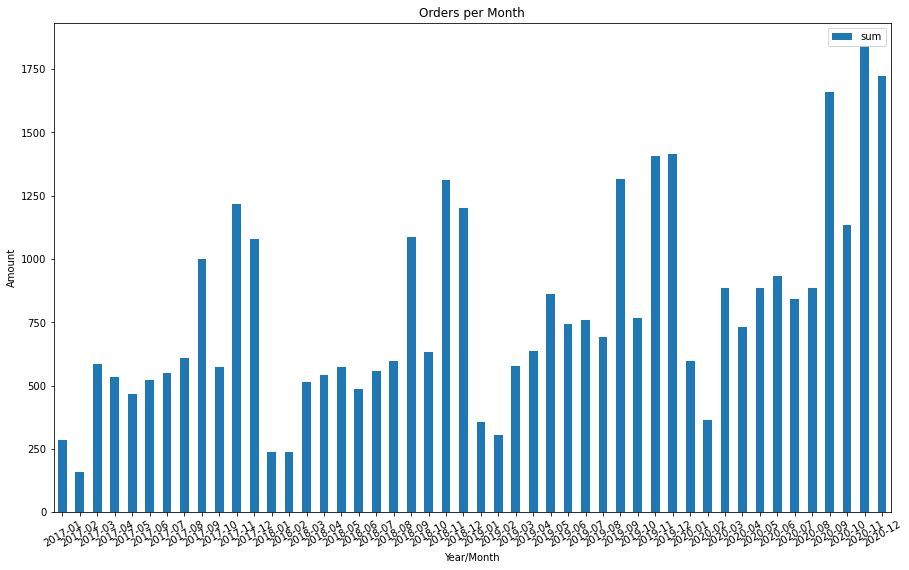

In [33]:
x.plot.bar(xlabel="Year/Month", ylabel="Amount", title="Orders per Month")
plt.rcParams["figure.figsize"] = [15, 9]
plt.xticks(rotation=30, horizontalalignment="center")
plt.show(block=True)